# 1 Data Wrangling <a id="data_wrangling"></a>

## Table of Contents  <a id="contents"></a>

<a id="contents"></a>
## 1.1 Table of Contents

- [1 Data Wrangling](#data_wrangling)
  - [1.1 Contents](#contents)
  - [1.2 Introduction](#introduction)
  - [1.3 Imports](#imports)
  - [1.4 Load the Data](#dataload)
  - [1.5 Dataset Cleaning](#dataset_cleaning)
      - [1.5.1 Timestamp Conversion & Feature Extraction](#timestamp)
      - [1.5.2 Categorical Data Check](#categorical)
      - [1.5.3 Data Integrity Check](#data_integrity)
  - [1.6 Distributions](#distributions)
  - [1.7 Save Data](#save_data)


## 1.2 Introduction<a id="introduction"></a>

### Problem:

With the rapid growth of the Metaverse, financial transactions in virtual environments have increased significantly. However, this also introduces new avenues for fraudulent transactions. Unlike traditional banking systems, transactions in the Metaverse lack stringent regulatory frameworks, making them prone to fraud. This project aims to develop a predictive model that identifies and flags potential fraudulent transactions within the Metaverse.

### Project: 

The solution will focus on building a machine learning model that uses pattern recognition and anomaly detection techniques to identify irregular transaction behaviors that deviate from the norm.

The success of the project will be measured by the model’s accuracy in identifying fraudulent transactions, the reduction in false positives, and its adaptability to new, unknown types of fraud that may evolve as the Metaverse grows.

### Clients: 

The primary stakeholders are financial regulators within the Metaverse, virtual asset service providers, and end-users who engage in transactions within the Metaverse. Secondary stakeholders include researchers and developers working on digital security solutions.

### Data: 

Data will be sourced from Metaverse platforms that record transaction details such as user IDs, transaction amounts, timestamps, and asset types. This data will be accessed through a Kaggle Dataset called "Metaverse Financial Transactions Dataset": https://www.kaggle.com/datasets/faizaniftikharjanjua/metaverse-financial-transactions-dataset 



## 1.3 Imports <a id="imports"></a>

In [31]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

## 1.4 Load the Data <a id='dataload'></a>

In [32]:
df = pd.read_csv('/Users/joshuabe/Downloads/Capstone 3 - Metaverse Fraud Prediction/metaverse_transactions_dataset.csv')

In [33]:
df.head()

,timestamp,hour_of_day,sending_address,receiving_address,amount,transaction_type,location_region,ip_prefix,login_frequency,session_duration,purchase_pattern,age_group,risk_score,anomaly
0,2022-04-11 12:47:27,12,0x9d32d0bf2c00f41ce7ca01b66e174cc4dcb0c1da,0x39f82e1c09bc6d7baccc1e79e5621ff812f50572,796.949206,transfer,Europe,192.000,3,48,focused,established,18.75,low_risk
1,2022-06-14 19:12:46,19,0xd6e251c23cbf52dbd472f079147873e655d8096f,0x51e8fbe24f124e0e30a614e14401b9bbfed5384c,0.010000,purchase,South America,172.000,5,61,focused,established,25.00,low_risk
2,2022-01-18 16:26:59,16,0x2e0925b922fed01f6a85d213ae2718f54b8ca305,0x52c7911879f783d590af45bda0c0ef2b8536706f,778.197390,purchase,Asia,192.168,3,74,focused,established,31.25,low_risk
3,2022-06-15 09:20:04,9,0x93efefc25fcaf31d7695f28018d7a11ece55457f,0x8ac3b7bd531b3a833032f07d4e47c7af6ea7bace,300.838358,transfer,South America,172.000,8,111,high_value,veteran,36.75,low_risk
4,2022-02-18 14:35:30,14,0xad3b8de45d63f5cce28aef9a82cf30c397c6ceb9,0x6fdc047c2391615b3facd79b4588c7e9106e49f2,775.569344,sale,Africa,172.160,6,100,high_value,veteran,62.50,moderate_risk


## 1.5 Dataset Cleaning <a id='dataset_cleaning'></a>

In [34]:
# Check the total number of rows, datatypes of each column, and non-null counts per column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78600 entries, 0 to 78599
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   timestamp          78600 non-null  object 
 1   hour_of_day        78600 non-null  int64  
 2   sending_address    78600 non-null  object 
 3   receiving_address  78600 non-null  object 
 4   amount             78600 non-null  float64
 5   transaction_type   78600 non-null  object 
 6   location_region    78600 non-null  object 
 7   ip_prefix          78600 non-null  float64
 8   login_frequency    78600 non-null  int64  
 9   session_duration   78600 non-null  int64  
 10  purchase_pattern   78600 non-null  object 
 11  age_group          78600 non-null  object 
 12  risk_score         78600 non-null  float64
 13  anomaly            78600 non-null  object 
dtypes: float64(3), int64(3), object(8)
memory usage: 8.4+ MB


We have a dataset with 14 columns and 78,600 rows with a mix of datatypes. This should be more than enough data to derive meaningful insights and feed into a built model later. 

In [35]:
# Check for any missing values across the dataset
df.isna().sum()

timestamp            0
hour_of_day          0
sending_address      0
receiving_address    0
amount               0
transaction_type     0
location_region      0
ip_prefix            0
login_frequency      0
session_duration     0
purchase_pattern     0
age_group            0
risk_score           0
anomaly              0
dtype: int64

There are no missing values across any of the features, which is good to see. 

### 1.5.1 Timestamp Conversion & Feature Extraction <a id='timestamp'></a>

Let's now convert the timestamp field to datetime and extract additional time-related features. 

In [36]:
# Convert 'timestamp' from object type to datetime type
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Generate additional time-related features: day of week and month from the timestamp
df['day_of_week'] = df['timestamp'].dt.dayofweek
df['month'] = df['timestamp'].dt.month

The timestamp column has been successfully converted to a datetime format. Additional time-related features like the day of the week and month have been extracted.

### 1.5.2 Categorical Data Check <a id='categorical'></a>

In [37]:
# Check unique values in categorical fields to identify any placeholders that might indicate missing data
unique_transaction_types = df['transaction_type'].unique()
unique_locations = df['location_region'].unique()
unique_patterns = df['purchase_pattern'].unique()
unique_age_groups = df['age_group'].unique()
unique_anomalies = df['anomaly'].unique()

unique_transaction_types, unique_locations, unique_patterns, unique_age_groups, unique_anomalies

(array(['transfer', 'purchase', 'sale', 'phishing', 'scam'], dtype=object),
 array(['Europe', 'South America', 'Asia', 'Africa', 'North America'],
       dtype=object),
 array(['focused', 'high_value', 'random'], dtype=object),
 array(['established', 'veteran', 'new'], dtype=object),
 array(['low_risk', 'moderate_risk', 'high_risk'], dtype=object))

**Categorical Data Overview**:

- **Transaction Types**: Includes 'transfer', 'purchase', 'sale', 'phishing', and 'scam'.
- **Location Regions**: Contains 'Europe', 'South America', 'Asia', 'Africa', and 'North America'.
- **Purchase Patterns**: Comprises 'focused', 'high_value', and 'random'.
- **Age Groups**: Encompasses 'established', 'veteran', and 'new'.
- **Anomaly Levels**: Features 'low_risk', 'moderate_risk', and 'high_risk'.

Now let's check for imbalanced data classes, which can be particularly common in fraud detection datasets. 

In [38]:
# Counting the number of times each category appears in specified columns
category_counts = {
    "transaction_type": df['transaction_type'].value_counts(),
    "location_region": df['location_region'].value_counts(),
    "purchase_pattern": df['purchase_pattern'].value_counts(),
    "age_group": df['age_group'].value_counts(),
    "anomaly": df['anomaly'].value_counts()
}

# Printing the results for each category
for category, counts in category_counts.items():
    print(f"Counts for {category}:\n{counts}\n")

Counts for transaction_type:
transaction_type
sale        25040
purchase    24940
transfer    22125
scam         3949
phishing     2546
Name: count, dtype: int64

Counts for location_region:
location_region
North America    15840
Europe           15807
Asia             15731
South America    15669
Africa           15553
Name: count, dtype: int64

Counts for purchase_pattern:
purchase_pattern
high_value    26422
random        26145
focused       26033
Name: count, dtype: int64

Counts for age_group:
age_group
veteran        26422
new            26145
established    26033
Name: count, dtype: int64

Counts for anomaly:
anomaly
low_risk         63494
moderate_risk     8611
high_risk         6495
Name: count, dtype: int64



Many of these categories appear to be balanced and representative of real-world fraud applications. 

- **For Transaction Types**, we have just 5% of the total showing as scams, amd 3% showing as phishing, which is representative of real-world data. The remaining 92% of transaction types are legitimate (sales, purchases, and transfers). 
- **For Purchase Patterns**, these are incredibly balanced, with roughly 26k values showing for high_value, random, and focused. 
- **For Age Groups**, these are also well balanced, with roughly 26k values showing for new, established, and veteran. 
- **For Anomaly**, 81% of values represent low risk, 11% of the values represent transactions with moderate risk, and just 8% of values represent high risk. These numbers seem representative of real-world fraud data risk classifications, where the large majority of transactions fall into the low risk category and only a minority falling into the moderate or high risk bucket. 

### 1.5.3 Data Integrity Check <a id='data_integrity'></a>

In [39]:
# Data Integrity Checks: 
max_timestamp = df['timestamp'].max()
max_amount = df['amount'].max()
max_login_frequency = df['login_frequency'].max()
max_session_duration = df['session_duration'].max()

min_timestamp = df['timestamp'].min()
min_amount = df['amount'].min()
min_login_frequency = df['login_frequency'].min()
min_session_duration = df['session_duration'].min()


print("The maximum timestamp is:", max_timestamp)
print("The maximum transaction amount is:", max_amount)
print("The maximum login frequency is:", max_login_frequency)
print("The maximum session duration is:", max_session_duration)

print("\nThe minimum timestamp is:", min_timestamp)
print("The minimum transaction amount is:", min_amount)
print("The minimum login frequency is:", min_login_frequency)
print("The minimum session duration is:", min_session_duration)

The maximum timestamp is: 2022-12-31 23:47:40
The maximum transaction amount is: 1557.150905156049
The maximum login frequency is: 8
The maximum session duration is: 159

The minimum timestamp is: 2022-01-01 00:00:45
The minimum transaction amount is: 0.01
The minimum login frequency is: 1
The minimum session duration is: 20


The data integrity seems to check out. The min and max timestamps indicate we have Metaverse transaction data for the full year 2022. The transaction amounts indicate a range from 0.01 up to over $1,500. The login frequencies range from one time to eight times. The session duration range from 20 min to 159 min. 

## 1.6 Distributions <a id="distributions"></a>

Let's look at the distributions of the various numerical features to find out whether there are any outliers. 

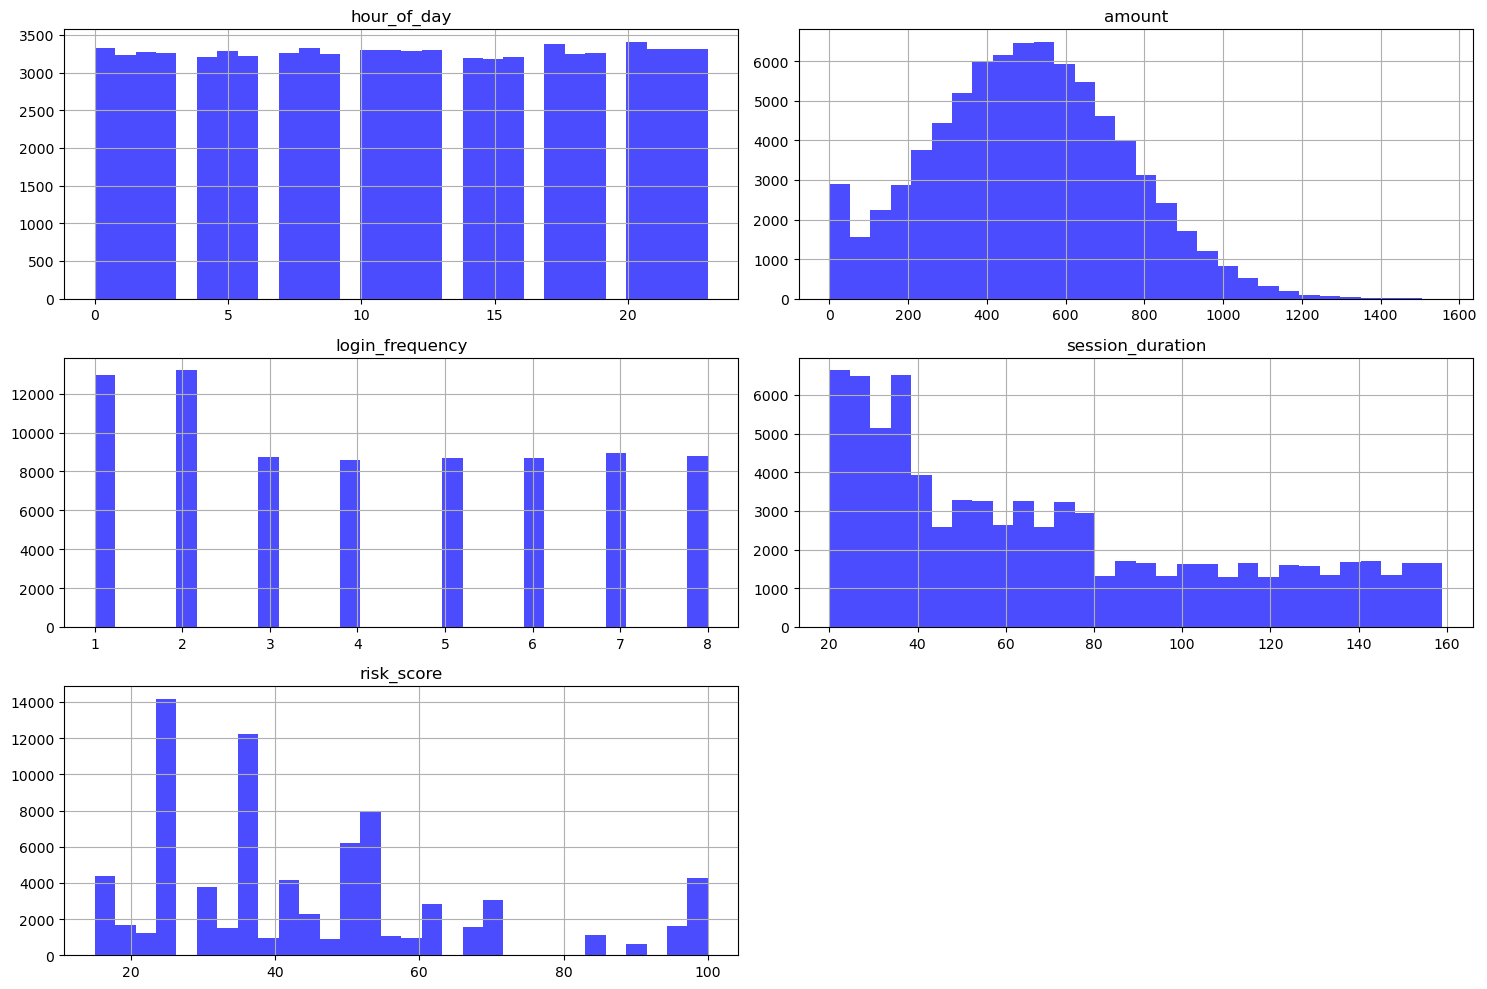

In [40]:
# Histograms of Numerical Features: 

# Selecting the numerical features for histograms
features = ['hour_of_day', 'amount', 'login_frequency', 'session_duration', 'risk_score']

# Creating histograms for selected features
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features):
    plt.subplot(3, 2, i + 1)  # Create subplots in a 3x2 layout
    plt.hist(df[feature], bins=30, alpha=0.7, color='blue')
    plt.title(feature)
    plt.grid(True)

plt.tight_layout()
plt.show()

- **Hour of Day**: This histogram shows a fairly uniform distribution across all hours of the day, suggesting that transaction activity is relatively constant throughout.
- **Amount**: The distribution of the transaction amounts is roughly bell-shaped, indicating a normal distribution with most transactions clustering around a central value. There's a peak around 600 units of the simulated currency, and the frequency of transactions gradually decreases as the amount increases from this peak.
- **Login Frequency**: This histogram indicates that lower login frequencies (1-2 times) are more common than higher frequencies. The frequency of logins drops significantly as the frequency value increases, suggesting that most users log in a few times rather than very frequently.
- **Session Duration**: The distribution of session durations is right-skewed, meaning most transaction sessions are short, with durations clustering at the lower end of the scale. Longer sessions are less common, as indicated by the gradual decrease in frequency as session duration increases.
- **Risk Score**: The risk score histogram shows multiple peaks, suggesting that it might be categorized or binned into specific ranges. Lower scores are more common, with notable peaks around 25 to 35. There's a significant drop in frequency as the risk score increases, indicating fewer transactions are categorized at higher risk levels.

These patterns can be used later to identify anomalies or unusual patterns that might indicate fraudulent activity. 

## 1.7 Save Data <a id="savve_data"></a>

In [41]:
# Save the DataFrame to a CSV file
df.to_csv('/Users/joshuabe/Downloads/Capstone 3 - Metaverse Fraud Prediction/metaverse_transactions_dataset_cleaned.csv', index=False)